### INTERNSHIP TOPIC - DATA SCIENCE (CLUSTERING)      

### NAME - SHREY JAIN

----------------------------------------------------------------------------------------------------

## IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

----------------------------------------------------------------------------------------------------

### IMPORTING DATASET 

In [ ]:
df = pd.read_csv('Mall_Customers_clustering.csv')

In [81]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


----------------------------------------------------------------------------------------------------

## ANALYZING DATA

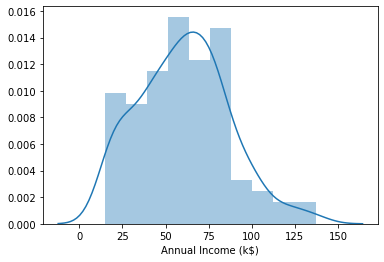

In [11]:
sns.distplot(df['Annual Income (k$)'])

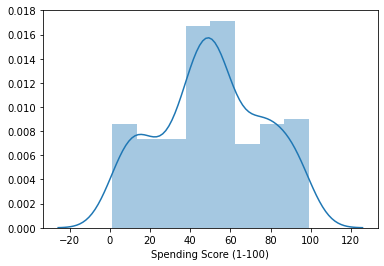

In [12]:
sns.distplot(df['Spending Score (1-100)'])

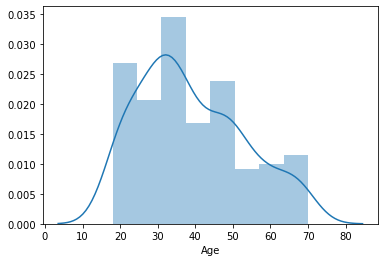

In [13]:
sns.distplot(df['Age'])

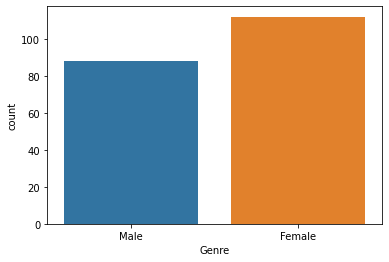

In [14]:
sns.countplot(df['Genre'])

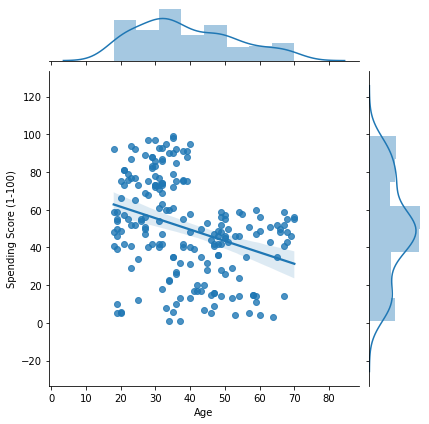

In [68]:
sns.jointplot(df['Age'],df['Spending Score (1-100)'],kind='reg')

----------------------------------------------------------------------------------------------------

#### CORRELATIONS BETWEEN FEATURES

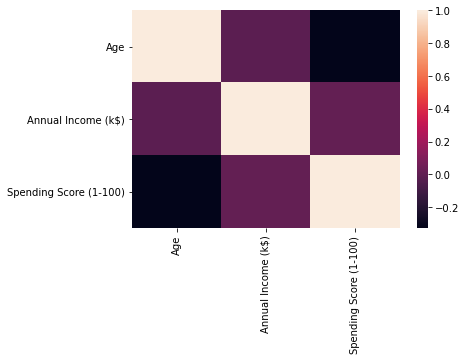

In [15]:
df = df.drop('CustomerID',axis=1)
sns.heatmap(df.corr())

### REMOVING GENDER COLUMN FROM OUR DATASET

In [17]:
x = df.iloc[:,[1,2,3]]

In [18]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


----------------------------------------------------------------------------------------------------

### WE NOW HAVE 3 FEATURES IN OUR DATASET, PERFORMING PCA TO REDUCE THE DIMENSIONS TO 2 TO VISUALIZE OUR DATA

In [19]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

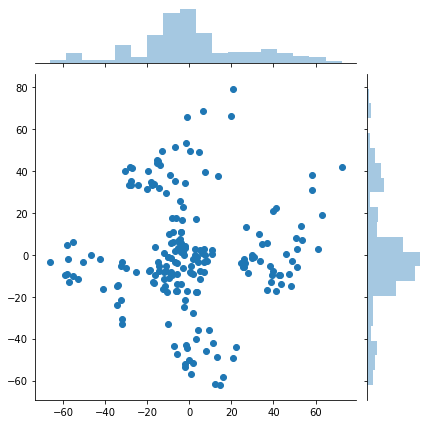

In [71]:
sns.jointplot(x_pca[:,0],x_pca[:,1])   

### USING ELBOW METHOD TO FIND RIGHT NUMBER OF CLUSTERS


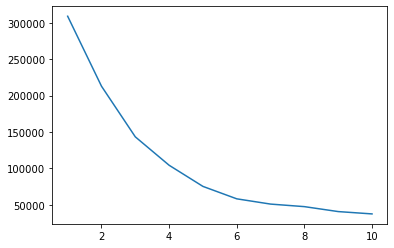

In [20]:
wcss = []                                     
for i in range(1, 11):
    km = KMeans(n_clusters = i,random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)

#### ABOVE WE CAN SEE THAT CURVE STARTS TO FLATTEN FROM CLUSTERS = 5 , THEREFORE WE CHOOSE NUMBER OF CLUSTERS  = 5

----------------------------------------------------------------------------------------------------

### KMEANS CLUSTERING  FITTED ON OUR DATA WITH 3 FEATURES AGE,INCOME,SPENDING SCORE

In [ ]:
km = KMeans(n_clusters=5)
y_means=km.fit_predict(x)    

In [34]:
centroids = km.cluster_centers_  ##CENTROIDS OF PREDICTED CLUSTERS

In [ ]:
labels = km.labels_  ## PREDICTED LABELS

----------------------------------------------------------------------------------------------------

#### VISUALIZING CLUSTERING OUTPUT

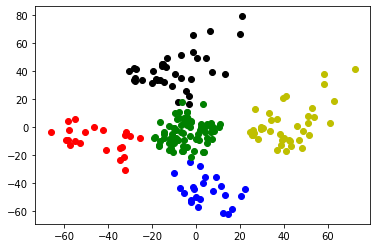

In [78]:
for i in range(1,200):
  if y_means[i] == 0:
    c1 = plt.scatter(x_pca[i,0],x_pca[i,1],c='r')
  elif y_means[i] == 1:
    c1 = plt.scatter(x_pca[i,0],x_pca[i,1],c='g')
  elif y_means[i] == 2:
    c1 = plt.scatter(x_pca[i,0],x_pca[i,1],c='b')
  elif y_means[i] == 3:
    c1 = plt.scatter(x_pca[i,0],x_pca[i,1],c='y')
  elif y_means[i] == 4:
    c1 = plt.scatter(x_pca[i,0],x_pca[i,1],c='k')
    
plt.show()

### Davies-Bouldin Index (EVALUATION METRIC)

In [73]:
sklearn.metrics.davies_bouldin_score(x_pca, labels)

0.5855949926191639

### VISUALIZING CENTROIDS OF OUR ABOVE PREDICTED CLUSTERS

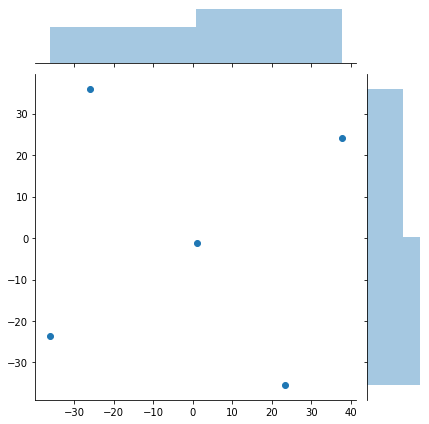

In [79]:
cent = PCA(n_components=2)
centpca = pca.fit_transform(centroids)
sns.jointplot(centpca[:,0],centpca[:,1])

----------------------------------------------------------------------------------------------------